<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
class Complex :
  def __init__(self, realpart, imagpart):
    self.r = realpart
    self.i = imagpart


In [3]:
x = Complex(3.0, -4.5)
x.r, x.i

(3.0, -4.5)

In [4]:
class Dog :
  def __init__(self,name) :
    self.name = name
    self.tricks= []
  def add_trick(self,trick):
    self.tricks.append(trick)
    

In [5]:
d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('paly dead')


In [7]:
d.tricks
e.tricks

['paly dead']

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
from pandas.errors import InvalidIndexError

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB
from typing_extensions import dataclass_transform


In [99]:
class LinearRegress :

  def __init__(self):
    self.df = 0
    self.data_IQR2 = 0
    self.train_test_data = 0
    self.Y_value = 0
    self.Y_test = 0


  
  def read_file(self, file_address) :
    print("-------------- file read ---------------")
    df = pd.read_csv(file_address, encoding = "cp949")
    df = pd.DataFrame(df)
    #return df

  def normalization(self,column_number):
    print("-------------- normalization ---------------")
    df[df.columns[column_number]] = np.log1p(df[df.columns[column_number]])
    sns.distplot(df[df.columns[column_number]])
    #return df

  def data_IQR(self,column_number) :
    print("-------------- Data_IQR ---------------")
    q1 = df[df.columns[column_number]].quantile(q=0.25)
    q3 = df[df.columns[column_number]].quantile(q=0.75)
    IQR = q3-q1
    data_IQR2 = df[(df[df.columns[column_number]] < q3 + IQR * 1.5) & 
                 (df[df.columns[column_number]] > q1 - IQR * 1.5)]
    sns.distplot(df[df.columns[column_number]])
    #return data_IQR2

  def before_making_model(self, x_list, column_number):
    num = x_list
    X = df[num]
    Y = df[df.columns[column_number]]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
    ct = ColumnTransformer([('scling', StandardScaler(), num)])
    ct.fit(X_train)
    X_train = ct.transform(X_train)
    X_test = ct.transform(X_test)
    train_test_data = [X_train, X_test, Y_train, Y_test]
    #return train_test_data

  def linearRegress(self, train_test_data,columns):
    print("----------LinearRegression value-----------")
    X_train, X_test, Y_train, Y_test = train_test_data
    lr = LinearRegression().fit(X_train, Y_train) 
    Y_pred = lr.predict(X_test)
    print("predict value\n",Y_pred)
    print("[linear]")
    print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
    print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 
    rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
    print("RMSE : {:.3f}". format(rmse)) 
    print(columns)
    print("절편", np.round(lr.intercept_, 3))
    print("가중치(beta)", np.round(lr.coef_, 3))
    Y_value = [Y_pred, Y_test]
    #return Y_value

  def Reset_index(self, Y_test,column_number):
    Y_test_df = (pd.DataFrame(Y_test)).reset_index()
    Y_test_df = pd.DataFrame(Y_test_df[df.columns[column_number]])
    #return Y_test

  def plot_picture(self, Y_pred,Y_test):
    print("----------- plot grow----------- ")
    %matplotlib Inline
    plt.plot(Y_pred)
    plt.plot(Y_test)

  def print_value(self):
    return df



-------------- file read ---------------
-------------- normalization ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-------------- Data_IQR ---------------
----------LinearRegression value-----------
predict value
 [2.69968882 2.69537222 2.67685396 2.66356519 2.63720303 2.66734652
 2.67529824 2.69005778 2.65074097 2.67381009 2.69141663 2.66091628
 2.657501   2.66406011 2.65368856 2.6716621  2.67486292 2.67636183
 2.65236673 2.65871539 2.6501332  2.65600339 2.6578112  2.67200504
 2.66054371 2.67178194 2.65041888 2.66481727 2.66314964 2.64932462
 2.64756309 2.66272271 2.64872489 2.64670487 2.64952096 2.67542807
 2.67416913 2.67988598 2.63268783 2.66349211 2.67619804 2.65743676
 2.64768825 2.65214561]
[linear]
train R2 : 0.013
test R2 : 0.039
RMSE : 0.122
Index(['ID', 'Year', 'Y', 'X1', 'X2', 'X3', 'X4'], dtype='object')
절편 2.661
가중치(beta) [ 0.013  0.001 -0.003 -0.004]
----------- plot grow----------- 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


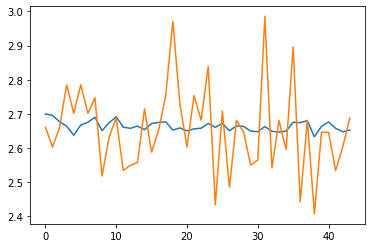

In [102]:
x = LinearRegress()
x.read_file("/content/drive/MyDrive/파이썬/data_revised.csv")
x.normalization(2)
x.data_IQR(2)
x.before_making_model([df.columns[3],df.columns[4],df.columns[5], df.columns[6]],2)

x.linearRegress(train_test_data, df.columns)
x.Reset_index(Y_value[1],2)
x.plot_picture(Y_value[0],Y_test)
#df2 = x.print_value()

-------------- normalization ---------------


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


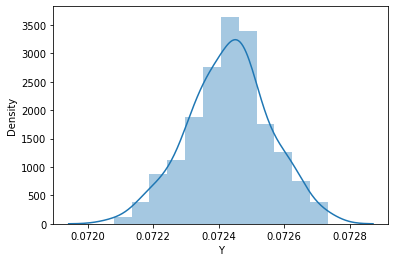

In [87]:
y = LinearRegress()
y.normalization(2)